In [1]:
import pandas as pd
import numpy as np

import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score


from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [28]:
df = pd.read_csv('cars.csv')
df

,brand,km_driven,fuel,owner,selling_price
0,Maruti,145500,Diesel,First Owner,450000
1,Skoda,120000,Diesel,Second Owner,370000
2,Honda,140000,Petrol,Third Owner,158000
3,Hyundai,127000,Diesel,First Owner,225000
4,Maruti,120000,Petrol,First Owner,130000
...,...,...,...,...,...
8123,Hyundai,110000,Petrol,First Owner,320000
8124,Hyundai,119000,Diesel,Fourth & Above Owner,135000
8125,Maruti,120000,Diesel,First Owner,382000
8126,Tata,25000,Diesel,First Owner,290000


In [29]:
df.isnull().sum()

brand            0
km_driven        0
fuel             0
owner            0
selling_price    0
dtype: int64

In [5]:
df=df.iloc[:,:]
df

,brand,km_driven,fuel,owner,selling_price
0,Maruti,145500,Diesel,First Owner,450000
1,Skoda,120000,Diesel,Second Owner,370000
2,Honda,140000,Petrol,Third Owner,158000
3,Hyundai,127000,Diesel,First Owner,225000
4,Maruti,120000,Petrol,First Owner,130000
...,...,...,...,...,...
8123,Hyundai,110000,Petrol,First Owner,320000
8124,Hyundai,119000,Diesel,Fourth & Above Owner,135000
8125,Maruti,120000,Diesel,First Owner,382000
8126,Tata,25000,Diesel,First Owner,290000


In [30]:
X= df.drop('selling_price', axis=1)
y= df['selling_price']

In [8]:
X

,brand,km_driven,fuel,owner
0,Maruti,145500,Diesel,First Owner
1,Skoda,120000,Diesel,Second Owner
2,Honda,140000,Petrol,Third Owner
3,Hyundai,127000,Diesel,First Owner
4,Maruti,120000,Petrol,First Owner
...,...,...,...,...
8123,Hyundai,110000,Petrol,First Owner
8124,Hyundai,119000,Diesel,Fourth & Above Owner
8125,Maruti,120000,Diesel,First Owner
8126,Tata,25000,Diesel,First Owner


In [31]:
y

0       450000
1       370000
2       158000
3       225000
4       130000
         ...  
8123    320000
8124    135000
8125    382000
8126    290000
8127    290000
Name: selling_price, Length: 8128, dtype: int64

In [32]:
df.isnull().sum()

brand            0
km_driven        0
fuel             0
owner            0
selling_price    0
dtype: int64

In [33]:
df

,brand,km_driven,fuel,owner,selling_price
0,Maruti,145500,Diesel,First Owner,450000
1,Skoda,120000,Diesel,Second Owner,370000
2,Honda,140000,Petrol,Third Owner,158000
3,Hyundai,127000,Diesel,First Owner,225000
4,Maruti,120000,Petrol,First Owner,130000
...,...,...,...,...,...
8123,Hyundai,110000,Petrol,First Owner,320000
8124,Hyundai,119000,Diesel,Fourth & Above Owner,135000
8125,Maruti,120000,Diesel,First Owner,382000
8126,Tata,25000,Diesel,First Owner,290000


In [ ]:
#ordinal encoding

In [34]:
df[['fuel', 'owner']]

,fuel,owner
0,Diesel,First Owner
1,Diesel,Second Owner
2,Petrol,Third Owner
3,Diesel,First Owner
4,Petrol,First Owner
...,...,...
8123,Petrol,First Owner
8124,Diesel,Fourth & Above Owner
8125,Diesel,First Owner
8126,Diesel,First Owner


In [35]:
df['fuel'].unique()

array(['Diesel', 'Petrol', 'LPG', 'CNG'], dtype=object)

In [36]:
df['owner'].unique()

array(['First Owner', 'Second Owner', 'Third Owner',
       'Fourth & Above Owner', 'Test Drive Car'], dtype=object)

In [37]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder(categories=[['Diesel','Petrol','LPG','CNG'],['First Owner','Second Owner','Third Owner','Fourth & Above Owner','Test Drive Car']])
df[['fuel', 'owner']]= oe.fit_transform(df[['fuel', 'owner']])

In [25]:
df[['fuel', 'owner']]

,fuel,owner
0,0.0,0.0
1,0.0,1.0
2,1.0,2.0
3,0.0,0.0
4,1.0,0.0
...,...,...
8123,1.0,0.0
8124,0.0,3.0
8125,0.0,0.0
8126,0.0,0.0


In [44]:
df

,brand,km_driven,fuel,owner,selling_price
0,Maruti,145500,0.0,0.0,450000
1,Skoda,120000,0.0,1.0,370000
2,Honda,140000,1.0,2.0,158000
3,Hyundai,127000,0.0,0.0,225000
4,Maruti,120000,1.0,0.0,130000
...,...,...,...,...,...
8123,Hyundai,110000,1.0,0.0,320000
8124,Hyundai,119000,0.0,3.0,135000
8125,Maruti,120000,0.0,0.0,382000
8126,Tata,25000,0.0,0.0,290000


In [45]:
#label encoding is used for output column only

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['brand']= le.fit_transform(df['brand'])

In [46]:
le.classes_

array(['Ambassador', 'Ashok', 'Audi', 'BMW', 'Chevrolet', 'Daewoo',
       'Datsun', 'Fiat', 'Force', 'Ford', 'Honda', 'Hyundai', 'Isuzu',
       'Jaguar', 'Jeep', 'Kia', 'Land', 'Lexus', 'MG', 'Mahindra',
       'Maruti', 'Mercedes-Benz', 'Mitsubishi', 'Nissan', 'Opel',
       'Peugeot', 'Renault', 'Skoda', 'Tata', 'Toyota', 'Volkswagen',
       'Volvo'], dtype=object)

In [47]:
df

,brand,km_driven,fuel,owner,selling_price
0,20,145500,0.0,0.0,450000
1,27,120000,0.0,1.0,370000
2,10,140000,1.0,2.0,158000
3,11,127000,0.0,0.0,225000
4,20,120000,1.0,0.0,130000
...,...,...,...,...,...
8123,11,110000,1.0,0.0,320000
8124,11,119000,0.0,3.0,135000
8125,20,120000,0.0,0.0,382000
8126,28,25000,0.0,0.0,290000


In [ ]:
#Scaling

In [50]:
import warnings
warnings.filterwarnings("ignore")

In [51]:
df=df.iloc[:,:]
df

,brand,km_driven,fuel,owner,selling_price
0,20,145500,0.0,0.0,450000
1,27,120000,0.0,1.0,370000
2,10,140000,1.0,2.0,158000
3,11,127000,0.0,0.0,225000
4,20,120000,1.0,0.0,130000
...,...,...,...,...,...
8123,11,110000,1.0,0.0,320000
8124,11,119000,0.0,3.0,135000
8125,20,120000,0.0,0.0,382000
8126,28,25000,0.0,0.0,290000


In [52]:
X= df.drop('selling_price', axis=1)
y= df['selling_price']

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=1)
X_train.shape, X_test.shape

((5689, 4), (2439, 4))

In [54]:
#x' = (x- mean)/std

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# transform train and test sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [57]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [58]:
scaler.mean_

array([1.79913869e+01, 6.99157710e+04, 4.76885217e-01, 4.59834769e-01])

In [59]:
X_train

,brand,km_driven,fuel,owner
2246,4,50000,1.0,0.0
2095,4,120000,0.0,1.0
3290,11,60000,1.0,0.0
6868,20,5000,1.0,0.0
6895,19,40000,0.0,0.0
...,...,...,...,...
7935,20,100000,1.0,2.0
5192,11,152000,0.0,0.0
3980,11,70000,1.0,0.0
235,20,110000,0.0,1.0


In [60]:
X_train_scaled

,brand,km_driven,fuel,owner
0,-1.881232,-0.380848,0.951591,-0.635874
1,-1.881232,0.957756,-0.867496,0.746957
2,-0.940037,-0.189618,0.951591,-0.635874
3,0.270071,-1.241379,0.951591,-0.635874
4,0.135615,-0.572077,-0.867496,-0.635874
...,...,...,...,...
5684,0.270071,0.575298,0.951591,2.129789
5685,-0.940037,1.569690,-0.867496,-0.635874
5686,-0.940037,0.001611,0.951591,-0.635874
5687,0.270071,0.766527,-0.867496,0.746957


In [61]:
np.round(X_train_scaled, 1)

,brand,km_driven,fuel,owner
0,-1.9,-0.4,1.0,-0.6
1,-1.9,1.0,-0.9,0.7
2,-0.9,-0.2,1.0,-0.6
3,0.3,-1.2,1.0,-0.6
4,0.1,-0.6,-0.9,-0.6
...,...,...,...,...
5684,0.3,0.6,1.0,2.1
5685,-0.9,1.6,-0.9,-0.6
5686,-0.9,0.0,1.0,-0.6
5687,0.3,0.8,-0.9,0.7


In [63]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

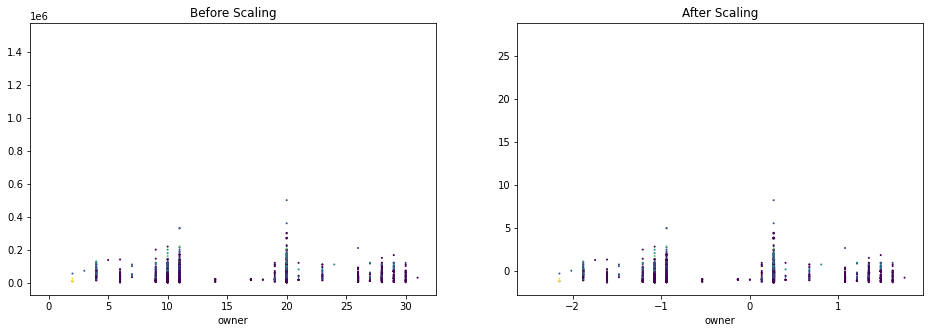

In [72]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
plt.scatter(X_train['brand'], X_train['km_driven'],X_train['fuel'], X_train['owner'])
plt.xlabel('brand')
plt.xlabel('km_driven')
plt.xlabel('fuel')
plt.xlabel('owner')
plt.title('Before Scaling')

plt.subplot(1,2,2)
plt.scatter(X_train_scaled['brand'], X_train_scaled['km_driven'], X_train_scaled['fuel'], X_train_scaled['owner'])
plt.xlabel('brand')
plt.xlabel('km_driven')
plt.xlabel('fuel')
plt.xlabel('owner')
plt.title('After Scaling')


plt.show()

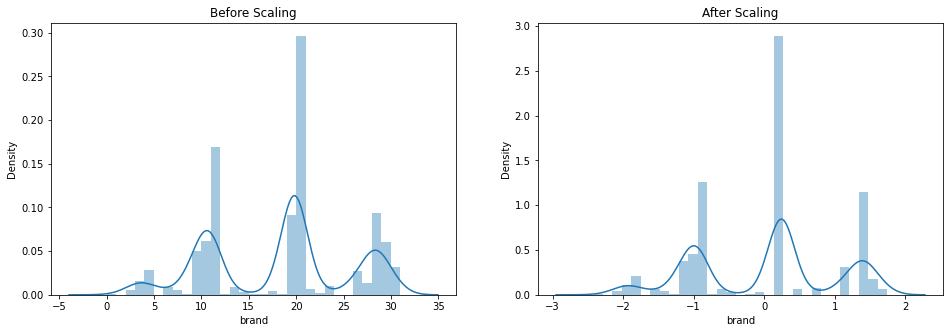

In [73]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(X_train['brand'])
plt.title('Before Scaling')

plt.subplot(1,2,2)
sns.distplot(X_train_scaled['brand'])
plt.title('After Scaling')

plt.show()

In [74]:
#without scaling
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
print("Accuracy on Actual data = ",accuracy_score(y_test,y_pred))

Accuracy on Actual data =  0.027470274702747027


In [75]:
#with scaling
lr_scaled = LogisticRegression()
lr_scaled.fit(X_train_scaled,y_train)
y_pred_scaled = lr_scaled.predict(X_test_scaled)
print("Accuracy on Scaled data = ",accuracy_score(y_test,y_pred_scaled))

Accuracy on Scaled data =  0.06355063550635506


In [ ]:

#outlier



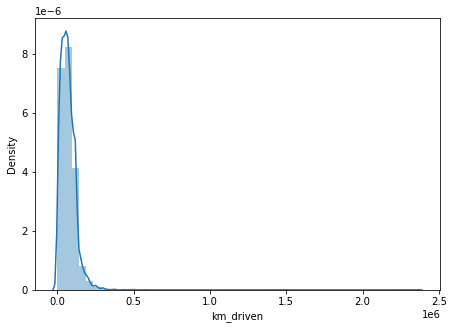

In [78]:
plt.figure(figsize=(16,5))

plt.subplot(1,2,2)
sns.distplot(df['km_driven'])

plt.show()

In [79]:
df['km_driven'].skew()

11.170909783549087

In [81]:
print("Mean value of km_driven",df['km_driven'].mean())
print("Std value of km_driven",df['km_driven'].std())
print("Min value of km_driven",df['km_driven'].min())
print("Max value of km_driven",df['km_driven'].max())

Mean value of km_driven 69819.51082677166
Std value of km_driven 56550.554958218585
Min value of km_driven 1
Max value of km_driven 2360457


In [82]:
# Finding the boundary values
upper_limit= df['km_driven'].mean() + 3*df['km_driven'].std()
lower_limit= df['km_driven'].mean() - 3*df['km_driven'].std()

In [83]:
# Finding outlier
outlier = df[(df['km_driven'] > upper_limit) | (df['km_driven'] < lower_limit)]
outlier

,brand,km_driven,fuel,owner,selling_price
394,29,240000,0.0,2.0,250000
401,28,265000,0.0,1.0,95000
461,29,250000,0.0,0.0,730000
886,19,300000,0.0,2.0,320000
998,20,360003,1.0,1.0,220000
...,...,...,...,...,...
7645,28,250000,0.0,1.0,110000
7945,29,250000,0.0,0.0,730000
7969,29,250000,0.0,0.0,730000
8030,28,300000,0.0,0.0,275000


In [84]:
# Removing outlier
new_df = df[(df['km_driven'] < upper_limit) & (df['km_driven'] > lower_limit)]
new_df.shape

(8056, 5)

In [ ]:
# z = (x- mean)/std

In [85]:
# Finding the z score
df['km_driven_zscore'] = (df['km_driven'] - df['km_driven'].mean())/df['km_driven'].std()

In [86]:
# Finding outlier
outlier = df[(df['km_driven_zscore'] > 3) | (df['km_driven_zscore'] < -3)]
outlier

,brand,km_driven,fuel,owner,selling_price,km_driven_zscore
394,29,240000,0.0,2.0,250000,3.009351
401,28,265000,0.0,1.0,95000,3.451434
461,29,250000,0.0,0.0,730000,3.186184
886,19,300000,0.0,2.0,320000,4.070349
998,20,360003,1.0,1.0,220000,5.131399
...,...,...,...,...,...,...
7645,28,250000,0.0,1.0,110000,3.186184
7945,29,250000,0.0,0.0,730000,3.186184
7969,29,250000,0.0,0.0,730000,3.186184
8030,28,300000,0.0,0.0,275000,4.070349


In [87]:
new_df1 = df[(df['km_driven_zscore'] < 3 ) & (df['km_driven_zscore'] > -3)]
new_df1.shape

(8056, 6)

<AxesSubplot:xlabel='km_driven'>

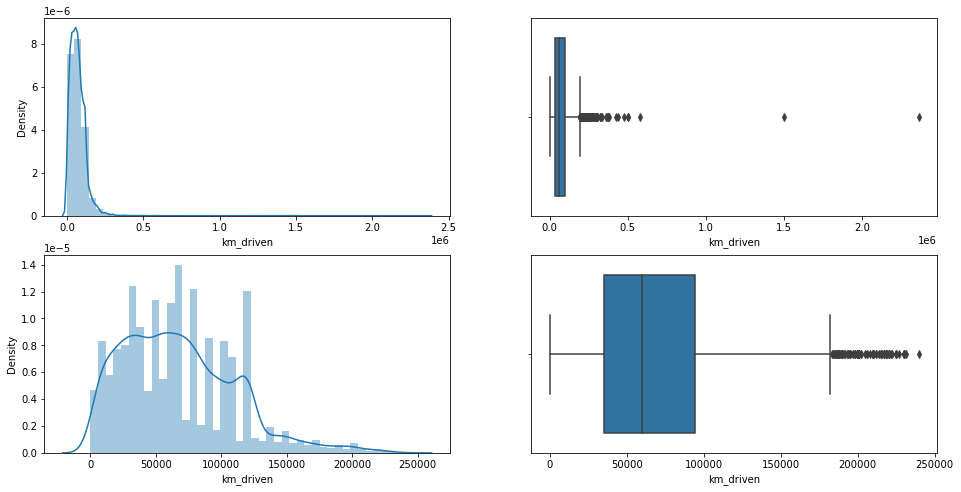

In [88]:
# Comparing

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['km_driven'])

plt.subplot(2,2,2)
sns.boxplot(df['km_driven'])

plt.subplot(2,2,3)
sns.distplot(new_df1['km_driven'])

plt.subplot(2,2,4)
sns.boxplot(new_df1['km_driven'])

In [89]:
#np.where(condition, true, false)
df2=df.copy()
df2['km_driven'] = np.where(
    df2['km_driven']>upper_limit,
    upper_limit,
    np.where(
        df2['km_driven']<lower_limit,
        lower_limit,
        df2['km_driven']
    )
)



<AxesSubplot:xlabel='km_driven'>

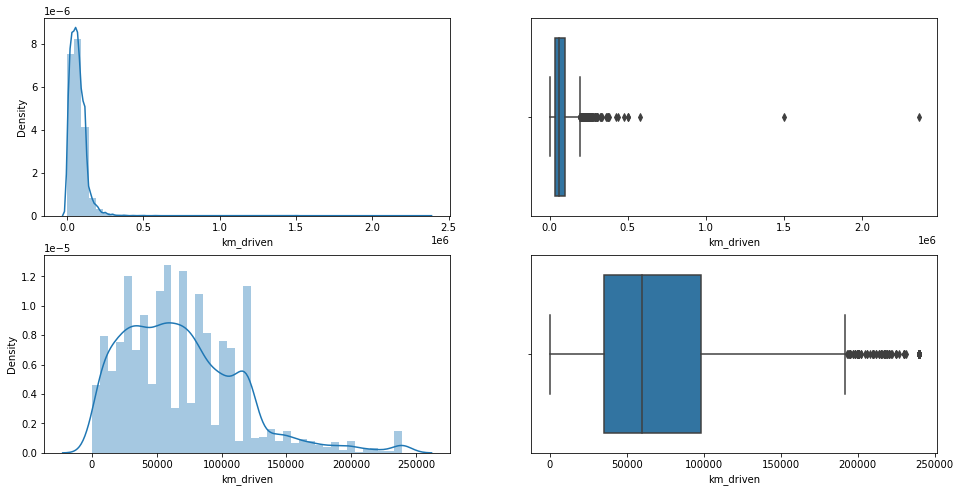

In [90]:
# Comparing

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['km_driven'])

plt.subplot(2,2,2)
sns.boxplot(df['km_driven'])

plt.subplot(2,2,3)
sns.distplot(df2['km_driven'])

plt.subplot(2,2,4)
sns.boxplot(df2['km_driven'])


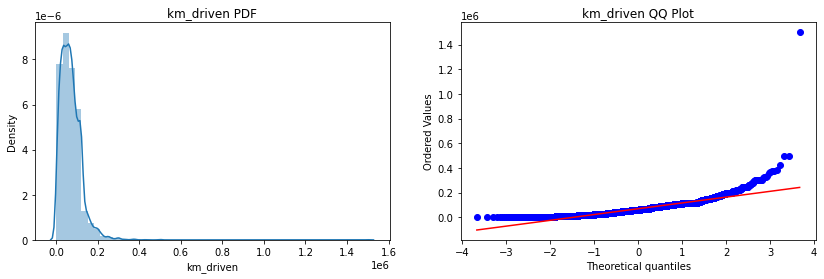

In [91]:
plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
sns.distplot(X_train['km_driven'])
plt.title('km_driven PDF')

plt.subplot(1,2,2)
stats.probplot(X_train['km_driven'], dist="norm", plot=plt)
plt.title('km_driven QQ Plot')

plt.show()

In [92]:
#without log transformation
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train,y_train)
y_pred= clf.predict(X_test)

print("accuracy : ", accuracy_score(y_test, y_pred))

accuracy :  0.027470274702747027


In [93]:
X_train

,brand,km_driven,fuel,owner
2246,4,50000,1.0,0.0
2095,4,120000,0.0,1.0
3290,11,60000,1.0,0.0
6868,20,5000,1.0,0.0
6895,19,40000,0.0,0.0
...,...,...,...,...
7935,20,100000,1.0,2.0
5192,11,152000,0.0,0.0
3980,11,70000,1.0,0.0
235,20,110000,0.0,1.0


In [94]:
#Function transformation (Log Transform)
from sklearn.preprocessing import FunctionTransformer
trf = FunctionTransformer(func=np.log1p)
X_train_transformed= trf.fit_transform(X_train)
X_test_transformed= trf.transform(X_test)

In [95]:
#with log transformation
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train_transformed,y_train)
y_pred= clf.predict(X_test_transformed)

print("accuracy : ", accuracy_score(y_test, y_pred))

accuracy :  0.04879048790487905


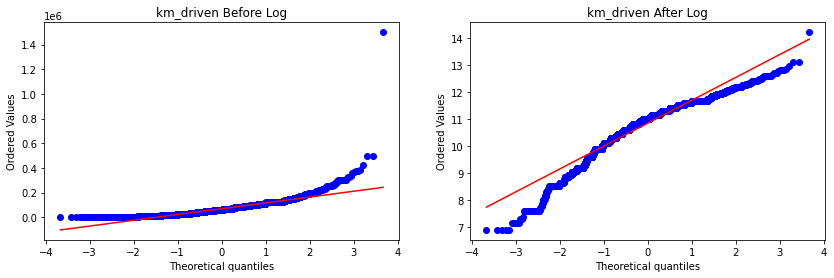

In [96]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(X_train['km_driven'], dist="norm", plot=plt)
plt.title('km_driven Before Log')

plt.subplot(122)
stats.probplot(X_train_transformed['km_driven'], dist="norm", plot=plt)
plt.title('km_driven After Log')

plt.show()


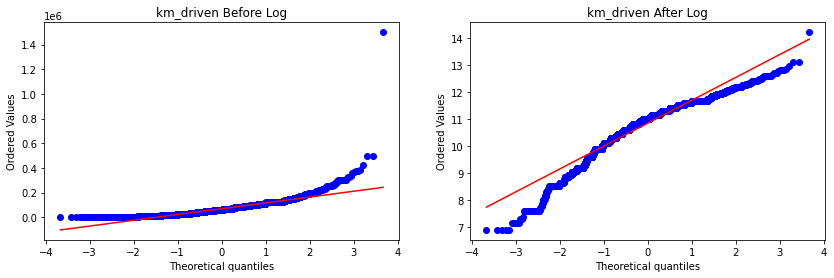

In [97]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(X_train['km_driven'], dist="norm", plot=plt)
plt.title('km_driven Before Log')

plt.subplot(122)
stats.probplot(X_train_transformed['km_driven'], dist="norm", plot=plt)
plt.title('km_driven After Log')

plt.show()



In [115]:
df

,brand,km_driven,fuel,owner,selling_price,km_driven_zscore
0,20,145500,0.0,0.0,450000,1.338280
1,27,120000,0.0,1.0,370000,0.887356
2,10,140000,1.0,2.0,158000,1.241022
3,11,127000,0.0,0.0,225000,1.011139
4,20,120000,1.0,0.0,130000,0.887356
...,...,...,...,...,...,...
8123,11,110000,1.0,0.0,320000,0.710523
8124,11,119000,0.0,3.0,135000,0.869673
8125,20,120000,0.0,0.0,382000,0.887356
8126,28,25000,0.0,0.0,290000,-0.792557


In [ ]:
#box cox

In [98]:
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score

from sklearn.preprocessing import PowerTransformer

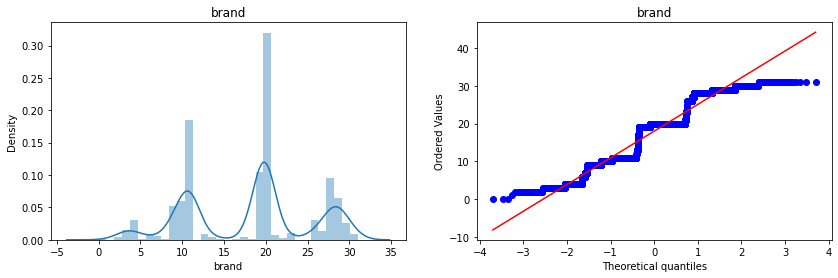

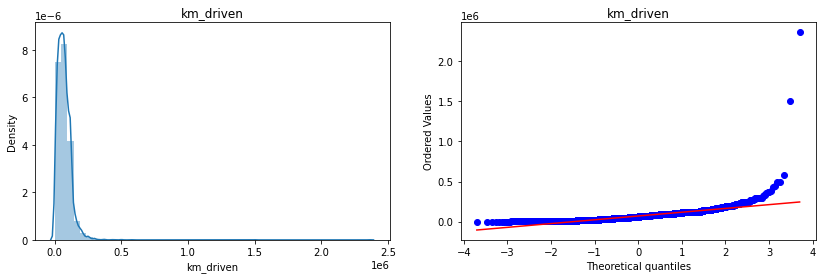

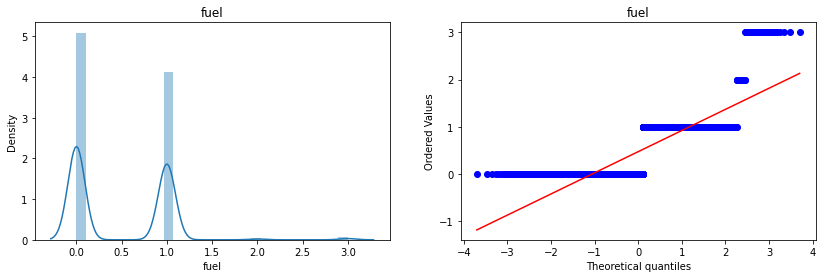

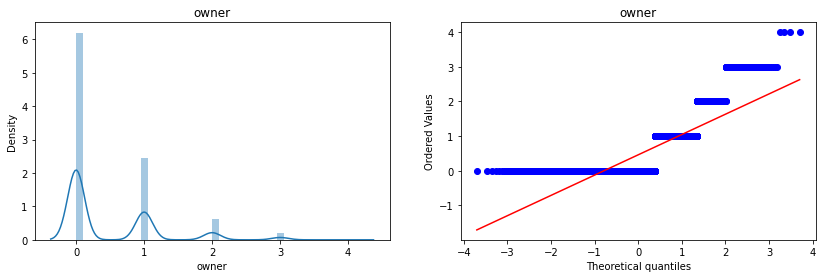

In [112]:
# Plotting the distplots without any transformation

for col in X_train.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.distplot(X_train[col])
    plt.title(col)

    plt.subplot(122)
    stats.probplot(X_train[col], dist="norm", plot=plt)
    plt.title(col)

    plt.show()

In [109]:
# Applying Regression without any transformation
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

r2_score(y_test,y_pred)

0.14969015500858096

In [116]:
import numpy as np
import warnings
np.warnings = warnings

In [117]:
# Applying Box-Cox Transform

from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
X_train_transformed = pt.fit_transform(X_train_scaled+ 0.00001 )
X_test_transformed = pt.transform(X_test+0.000001)
pd.DataFrame({'cols':X_train.columns,'box_cox_lambdas':pt.lambdas_})

,cols,box_cox_lambdas
0,brand,1.117417
1,km_driven,0.275529
2,fuel,0.345177
3,owner,-0.801991


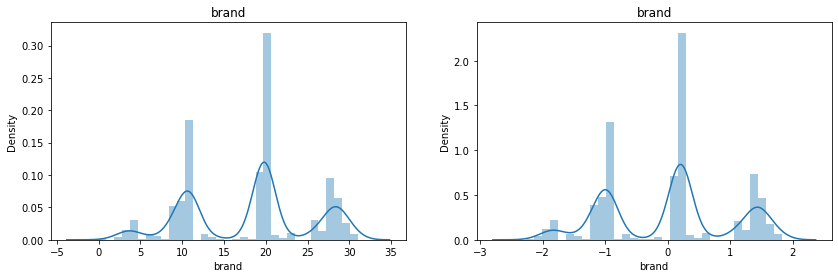

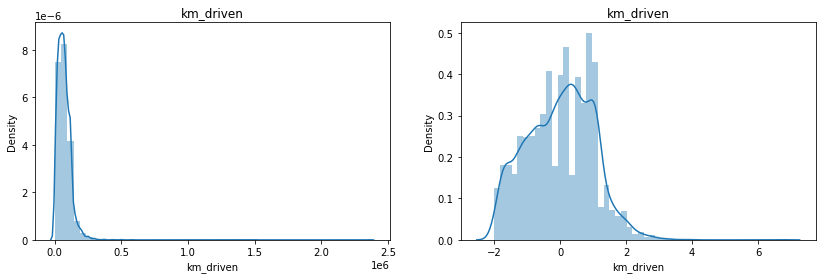

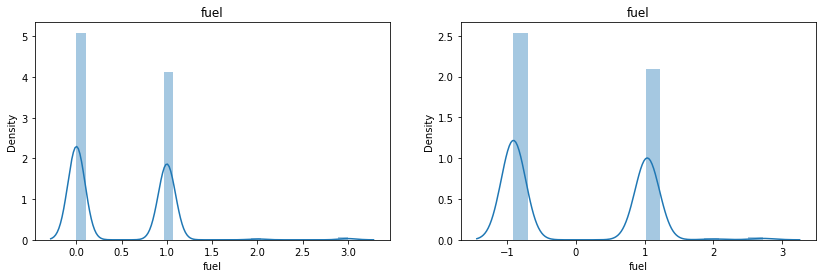

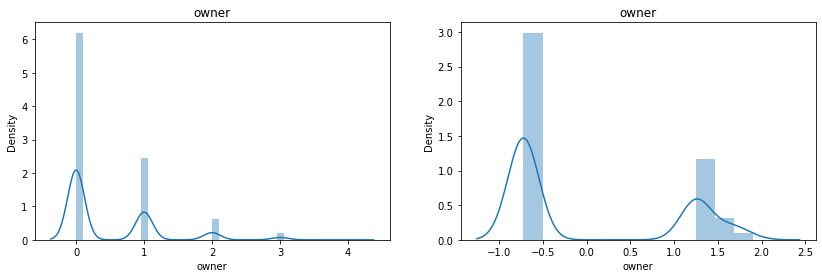

In [119]:
# Before and after comparision for Box-Cox Plot
X_train_transformed = pd.DataFrame(X_train_transformed,columns=X_train.columns)

for col in X_train_transformed.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.distplot(X_train[col])
    plt.title(col)

    plt.subplot(122)
    sns.distplot(X_train_transformed[col])
    plt.title(col)

    plt.show()

